### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import LeaveOneOut

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Import libraries
%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 9]


In [70]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'sonar.all-data', header=None)

# Encoding R (Rocks) as 0 and M (Mines) as 1
cleanup_values = {60: {"R": 0, "M": 1}}
df = df.replace(cleanup_values)

# Split into input and output elements
data = df.values
X, y = data[:, :-1], data[:, -1]

# Print original, X and y shapes
print(df.shape)
print(X.shape, y.shape)


(208, 61)
(208, 60) (208,)


In [71]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

# Define model
classifier = RandomForestClassifier(random_state=42)

# Define grid params
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
}

# Cross-validation strategy
loo = LeaveOneOut()

# Define search
grid_search = GridSearchCV(estimator=classifier,
                      param_grid=grid_param,
                      scoring='accuracy',
                      cv=loo,
                      n_jobs=-1)

# Execute search
grid_search.fit(X_train, y_train)

# Summarize result
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print('Best Estimator: %s' % grid_search.best_estimator_)
print('Best Cross-Validation Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

# Convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)


<AxesSubplot:xlabel='param_n_estimators', ylabel='param_criterion'>

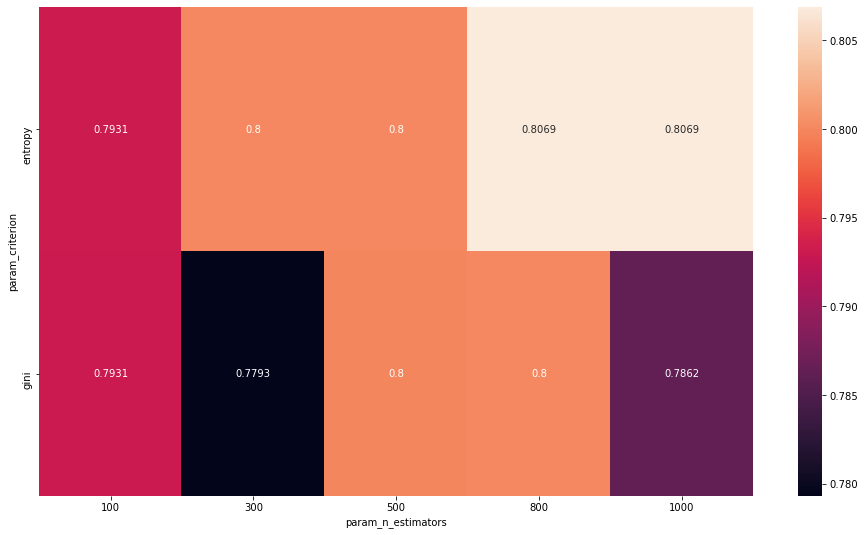

In [63]:
max_scores = results.groupby(['param_criterion', 'param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')


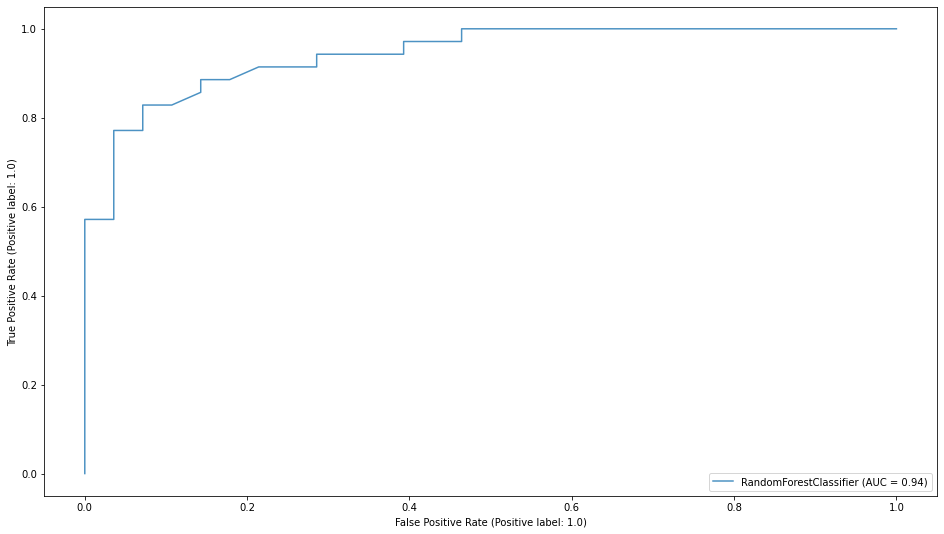

In [64]:
rfc = RandomForestClassifier(n_estimators=800, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [65]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_excel(url + 'CTG.xls', "Raw Data")

columns = ['LB', 'AC', 'FM', 'UC',
            'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
            'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
            'Tendency', 'CLASS', 'NSP']

df = df[columns]
df.dropna()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


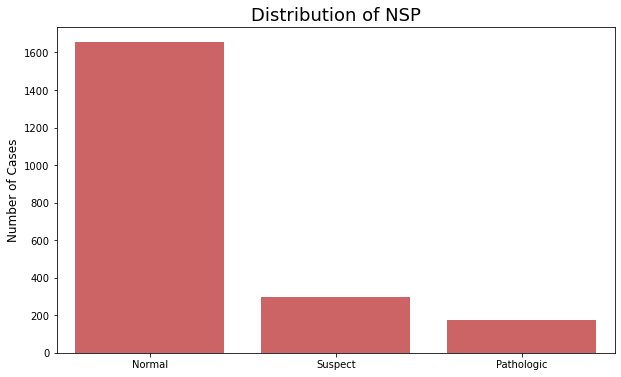

In [67]:
import matplotlib.cm as cm # To make pretty graphs
import seaborn as sns
import numpy as np
color = sns.color_palette()

cnt_srs = df['NSP'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(10,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
N = 3
ind = np.arange(N) 
plt.xticks(ind, ('Normal','Suspect', 'Pathologic'))
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Distribution of NSP', fontsize=18)
plt.show()